In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
#import KDEpy
from scipy.stats import norm
#from scipy.stats import multivariate_normal as norm3D
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import multivariate_normal as norm3
import sys
from scipy.stats import norm
from Bayes import *

In [8]:
dat5_0=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.105N100kP1/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
dat4_0=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.1N100kP1/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
dat3_0=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.1N100kP2/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
dat2_0=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/Test5/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
dat1_0=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/Test6/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
#dat0_0=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/Test1/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])

samp=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.1N100kP1/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
#dat1=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.1N100kP2/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
dat5=dat5_0.values
dat4=dat4_0.values
dat3=dat3_0.values
dat2=dat2_0.values
#dat1=dat1_0.values
#dat0=dat0_0.values
samp=samp.values

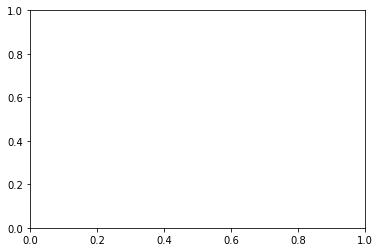

In [8]:
makehists1D("/home/jon/Lens_Bois/plots/","1D Comparison",dat5,dat0,samp,'Off5','Off0')

In [9]:
n=[50,50,50,10,10,1]

B,N,B_r=LongBayes(dat5,dat4,samp[70000:71000,:],n,NUMCUTS=1,DIM=0)
print("Bayes Factor: ",B)
print("Number of Bins: ",N)
print("Reduced Bayes Factor:",B_r)

Bayes Factor:  -15433.265425560776
Number of Bins:  4456
Reduced Bayes Factor: -3.463479673599815


In [4]:
a='Hello There'
print(a)
a=a.replace(' ','_')
print(a)

Hello There
Hello_There


In [14]:
n=[10,10,10,50,50,50]

B,N,B_r=LongBayes(dat3,dat4,samp[70000:71000,:],n,NUMCUTS=50,DIM=3)
print("Bayes Factor: ",B)
print("Number of Bins: ",N)
print("Reduced Bayes Factor:",B_r)

Bayes Factor:  -1950.7173665007779
Number of Bins:  2316
Reduced Bayes Factor: -0.8422786556566398


In [5]:
r=[(0,185),(0,185),(0,92),(0,1.1),(0,1.1),(0,1.1)]
n=[50,50,50,10,10,100]
B=LongBayes(dat2,dat1,samp[84000:84400,:],n,r,100,5)
print("Bayes Factor: ",B)

NameError: name 'dat1' is not defined

In [27]:
r=[(0,185),(0,92),(0.4,1.1),(0.4,1.1)]
n=[50,50,50,10]
a,b,E,HP1,HP2,HS=BayesSimple6(dat2,dat1,samp[84000:84400,:],n,r)
E

0.0

In [29]:
arr=[]
P1=dat5
P2=dat4
S=samp
size=500
p1=P1
p2=P2
r=[(0,185),(0,92),(0.4,1.1),(0.4,1.1)]
n=[50,50,50,10]
#sample_loc=np.random.randint(low=0,high=(S.size/3)-size)
#p1_loc=np.random.randint(low=0,high=(P1.size/3)-size)
#p2_loc=np.random.randint(low=0,high=(P2.size/3)-size)
for i in range(0,int(S[:,0].size),size):
    s=S[i:i+size,:]

    a,b,E,HP1,HP2,HS=BayesSimple6(p1,p2,s,n,r)
    arr.append(E)
#print(E)

NameError: name 'func' is not defined

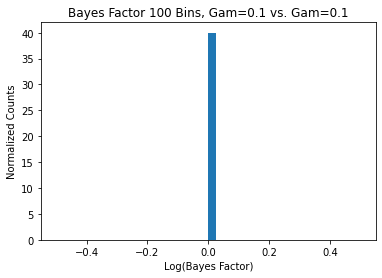

In [30]:
fig=plt.figure()
N,bins,p=plt.hist(arr,bins=40,density=True)
#plt.hold(True)
plt.title("Bayes Factor 100 Bins, Gam=0.1 vs. Gam=0.1")
plt.xlabel("Log(Bayes Factor)")
plt.ylabel("Normalized Counts")
#plt.savefig()
xarr=(bins[0:len(bins)-1]+bins[1:len(bins)])/2
popt,pcov=sp.optimize.curve_fit(func,xarr,N,p0=[-50000,20000])
mu=popt[0]
sig=popt[1]
r=norm()
plt.plot(xarr,(1/sig)*r.pdf((xarr-mu)/sig))
plt.legend(["Guassian Fit","Hist"])
textstr=r'$\frac{\mu}{\sigma}$= '+str(round(mu/sig,2))
plt.figtext(0.15, 0.75, textstr,fontsize=15,bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("/home/jon/Lens_Bois/plots/Bayesgam0.1gam0.1B100S=500.png")

print(mu)
print((mu)/sig)

(array([ 17.,  45., 116., 222., 254., 266., 259., 288., 295., 238.]),
 array([0.6263 , 0.66426, 0.70222, 0.74018, 0.77814, 0.8161 , 0.85406,
        0.89202, 0.92998, 0.96794, 1.0059 ]),
 <a list of 10 Patch objects>)

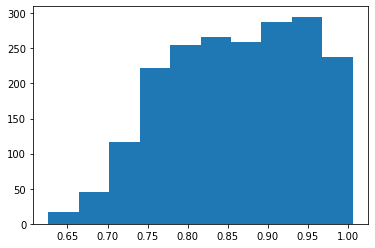

In [53]:
fig, ax = plt.subplots()
ax.hist(r2)

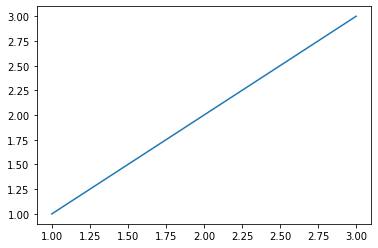

In [5]:
plt.plot([1,2,3],[1,2,3])
plt.show()